## Programming for Data Analysis Project II
### Author: Sean Elliott

****

In [2]:
import pandas as pd

import numpy as np

import seaborn as sns 

import sklearn.neighbors as nei

import matplotlib.pyplot as plt 

import sklearn.model_selection as mod

import seaborn as sns

import sklearn.preprocessing 

## Wisconsin Breat Cancer dataset 
![](https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg)

This project is an indepth look att he 'Wisconsin Breats Cancer dataset which was produced on 15/07/1995. It is a multivariate dataset with 699 instances of data. There are 10 'Attributes' in the dataset which will be explored in the project below. The project must consist of the following requirements. We are required to;

• Undertake an analysis/review of the dataset and present an overview and background.
• Provide a literature review on classifiers which have been applied to the dataset and compare their performanc.
• Present a statistical analysis of the dataset.
• Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.
• Compare, contrast and critique your results with reference to the literature.
• Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints.

## What is breast cancer?

[Breast cancer](#https://www.uicc.org/what-we-do/thematic-areas-work/breast-cancer?gclid=EAIaIQobChMIutzCy4Hv-wIVybHtCh0XWQfTEAAYAiAAEgK8F_D_BwE) is the most diagnsoed cancer in the world. It accounts for 1 in 4 cancer cases amoungst women and is the leading cause of death from cancer for women. There are an estimated 2.2 million new cases of cancer diagnosed in 2020, 1 in 10 of those diagnoses is breast cancer.  

![](https://www.uicc.org/sites/main/files/thumbnails/image/Breast-cancer-graph-top-cancer-per-country-new-cases-2020-female-web.png_0.png)

The dataset below contains many classifications which help doctors firstly to correctly diagnose whether a sample is benign or malignant, and secondly what the next course of action will be. I will give a glossary below of the attributes below and their meanings - ultimately this will help with my understanding of the dataset and hopefully during the Machine Learning stage it will help clarify a few things. Something to note is that each attribute is classified on a scale of 1 - 10, barring the final attribute called 'Class' which is either '2' or '4'. The terms in the dataset are as below:
 
1) Sample Number - The Sample ID number 
 
2) Clump Thickness - Benign cells tend to be grouped in monolayers, while cancerous cells are often grouped in multilayers.
 
3) Cell Size - Cancer cells tend to vary in size and shape
 
4) Cell Shape -  Cancer cells tend to vary in shape and size
 
5) Adhesion - Normal cells tend to stick together while cancer cells tend to lose this ability, so the loss of adhesion is a sign of malignancy.

6) Single Epithelial Cell Size - If significantly enlarged may be a malignant cell.
 
7) Bare Nuclei - This is a term used for nuclei not surrounded by cytoplasm (the rest of the cell). Those are typically seen in benign tumors.
 
8) Bland Chromatin - Describes a uniform "texture" of the nucleus seen in benign cells. In cancer cells, the chromatin tends to be more coarse and to form clumps.
 
9) Normal Nucleoli - Nucleoli are small structures seen in the nucleus. In normal cells, the nucleolus is usually very small if visible at all. The nucleoli become more prominent in cancer cells, and sometimes there are multiple.
 
10) [Mitoses](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/mitotic-rate) - 'A measure of how fast cancer cells are dividing and growing.'
 
11) Class - description of data, 2 is for Benign and 4 is Malignant.

****
 
 Descriptions above were taken from this [website](https://www.neuraldesigner.com/learning/examples/breast-cancer-diagnosis#:~:text=Epithelial%20cells%20that%20are%20significantly,typically%20seen%20in%20benign%20tumors.).

In [3]:
#start by loading dataset and adding headers to columns for clarity
df = pd.read_csv('https://raw.githubusercontent.com/SeanE15/Programming_for_data_analysis_II/main/Dataset/breast-cancer-wisconsin.data')
df.columns = ["Sample_Number", "Clump_Thickness", "Cell_Size", "Cell_Shape","Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

In [4]:
# remove any variable which might muddy the dataset's values
df = df.dropna()

In [5]:
# check that no more NaN values are in the data set.
print(df.isnull().sum())

Sample_Number                  0
Clump_Thickness                0
Cell_Size                      0
Cell_Shape                     0
Adhesion                       0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


# Introduction to the data

Now that we have cleaned the dataset above, we will now start to disect the informaiton, catergorise it, and deduce which data is most pertinent to the investigation we are trying to carry out.

C:\Users\Sean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

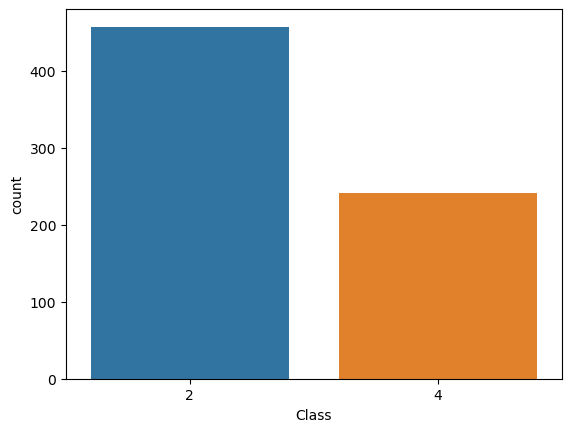

In [6]:
#We start by asking the question, formt he dataset, which samples are bening and which are malignant. If the data set presents a '2'
# the sample is benign, if a '4' is presented then the samples are malignant.

df['Class'].value_counts()
sns.countplot(df.Class,label='Count')
plt.show

 From the investigation above we can see that 457 of the samples tested were benign, while 241 cases were malignant.


In [7]:
df.head()

,Sample_Number,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


<AxesSubplot:>

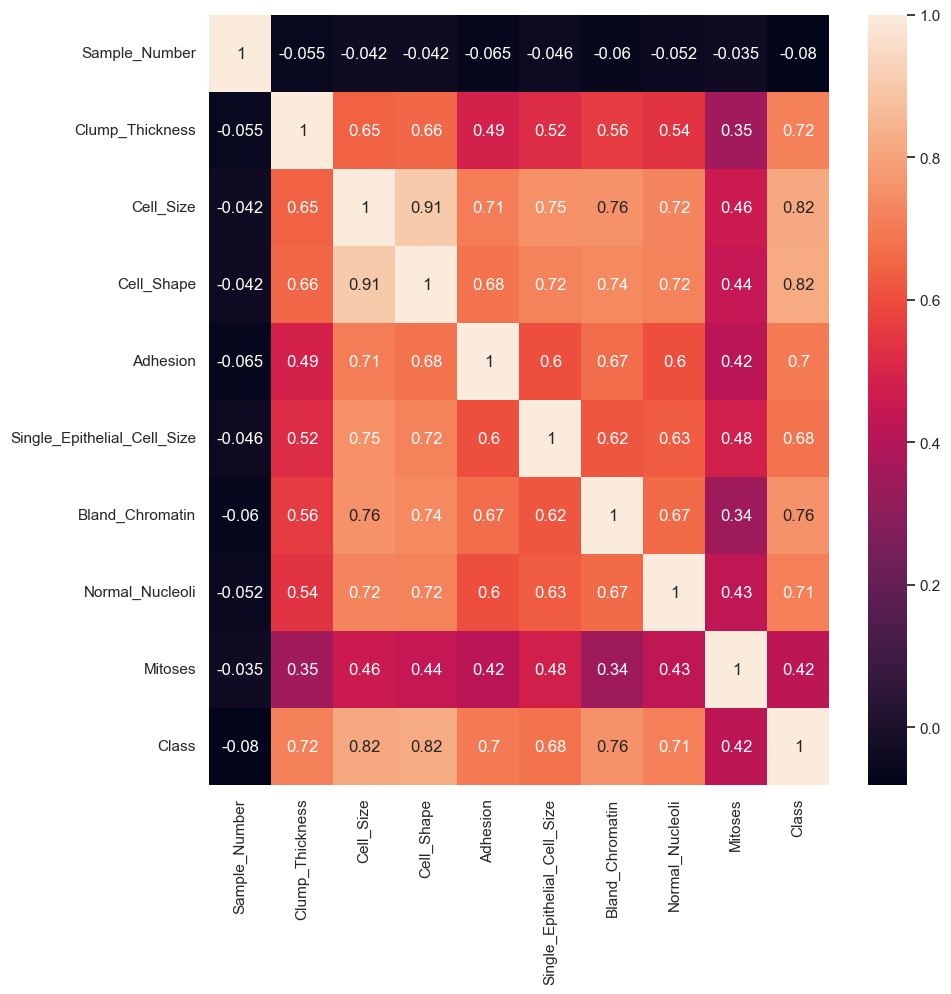

In [15]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), vmin=None, vmax=None, annot=True)

<AxesSubplot:>

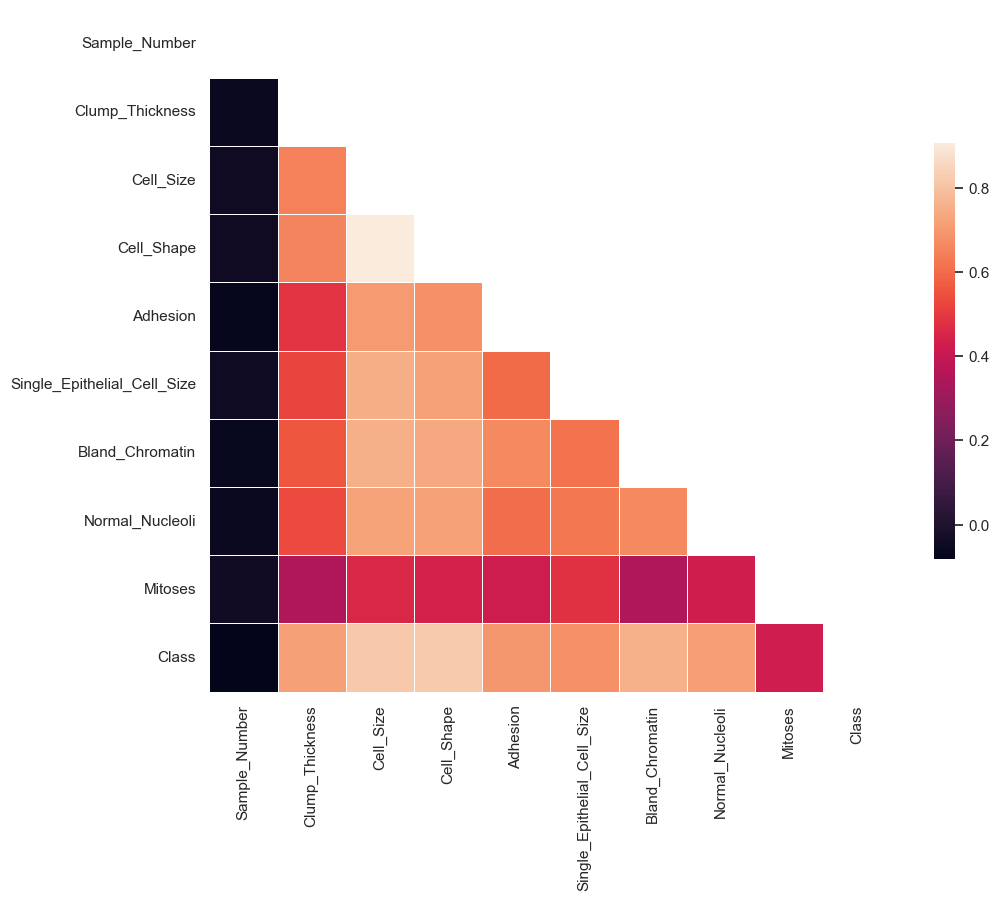

In [13]:
#Plot below is just a copy of the above heatmap but in a more presentable and more discernable way of looking at the data correlations.

sns.set_theme(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormapcmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, cbar_kws={"shrink": .6})

In a correlation heat map, the way it is interpreted is the higher the correlation value, the mroe correlated the two variables are:

1) Cell Shape, Cell Size and Clump Thickness are almost directly correlated with either a Benign or Malignant diagnosis.
2) Mitoses is strongly linked with Cell Size and Single Epithelial Cell Size.
3) Bland Chromatin is also strong correlated with Class (Benign or Malignant).

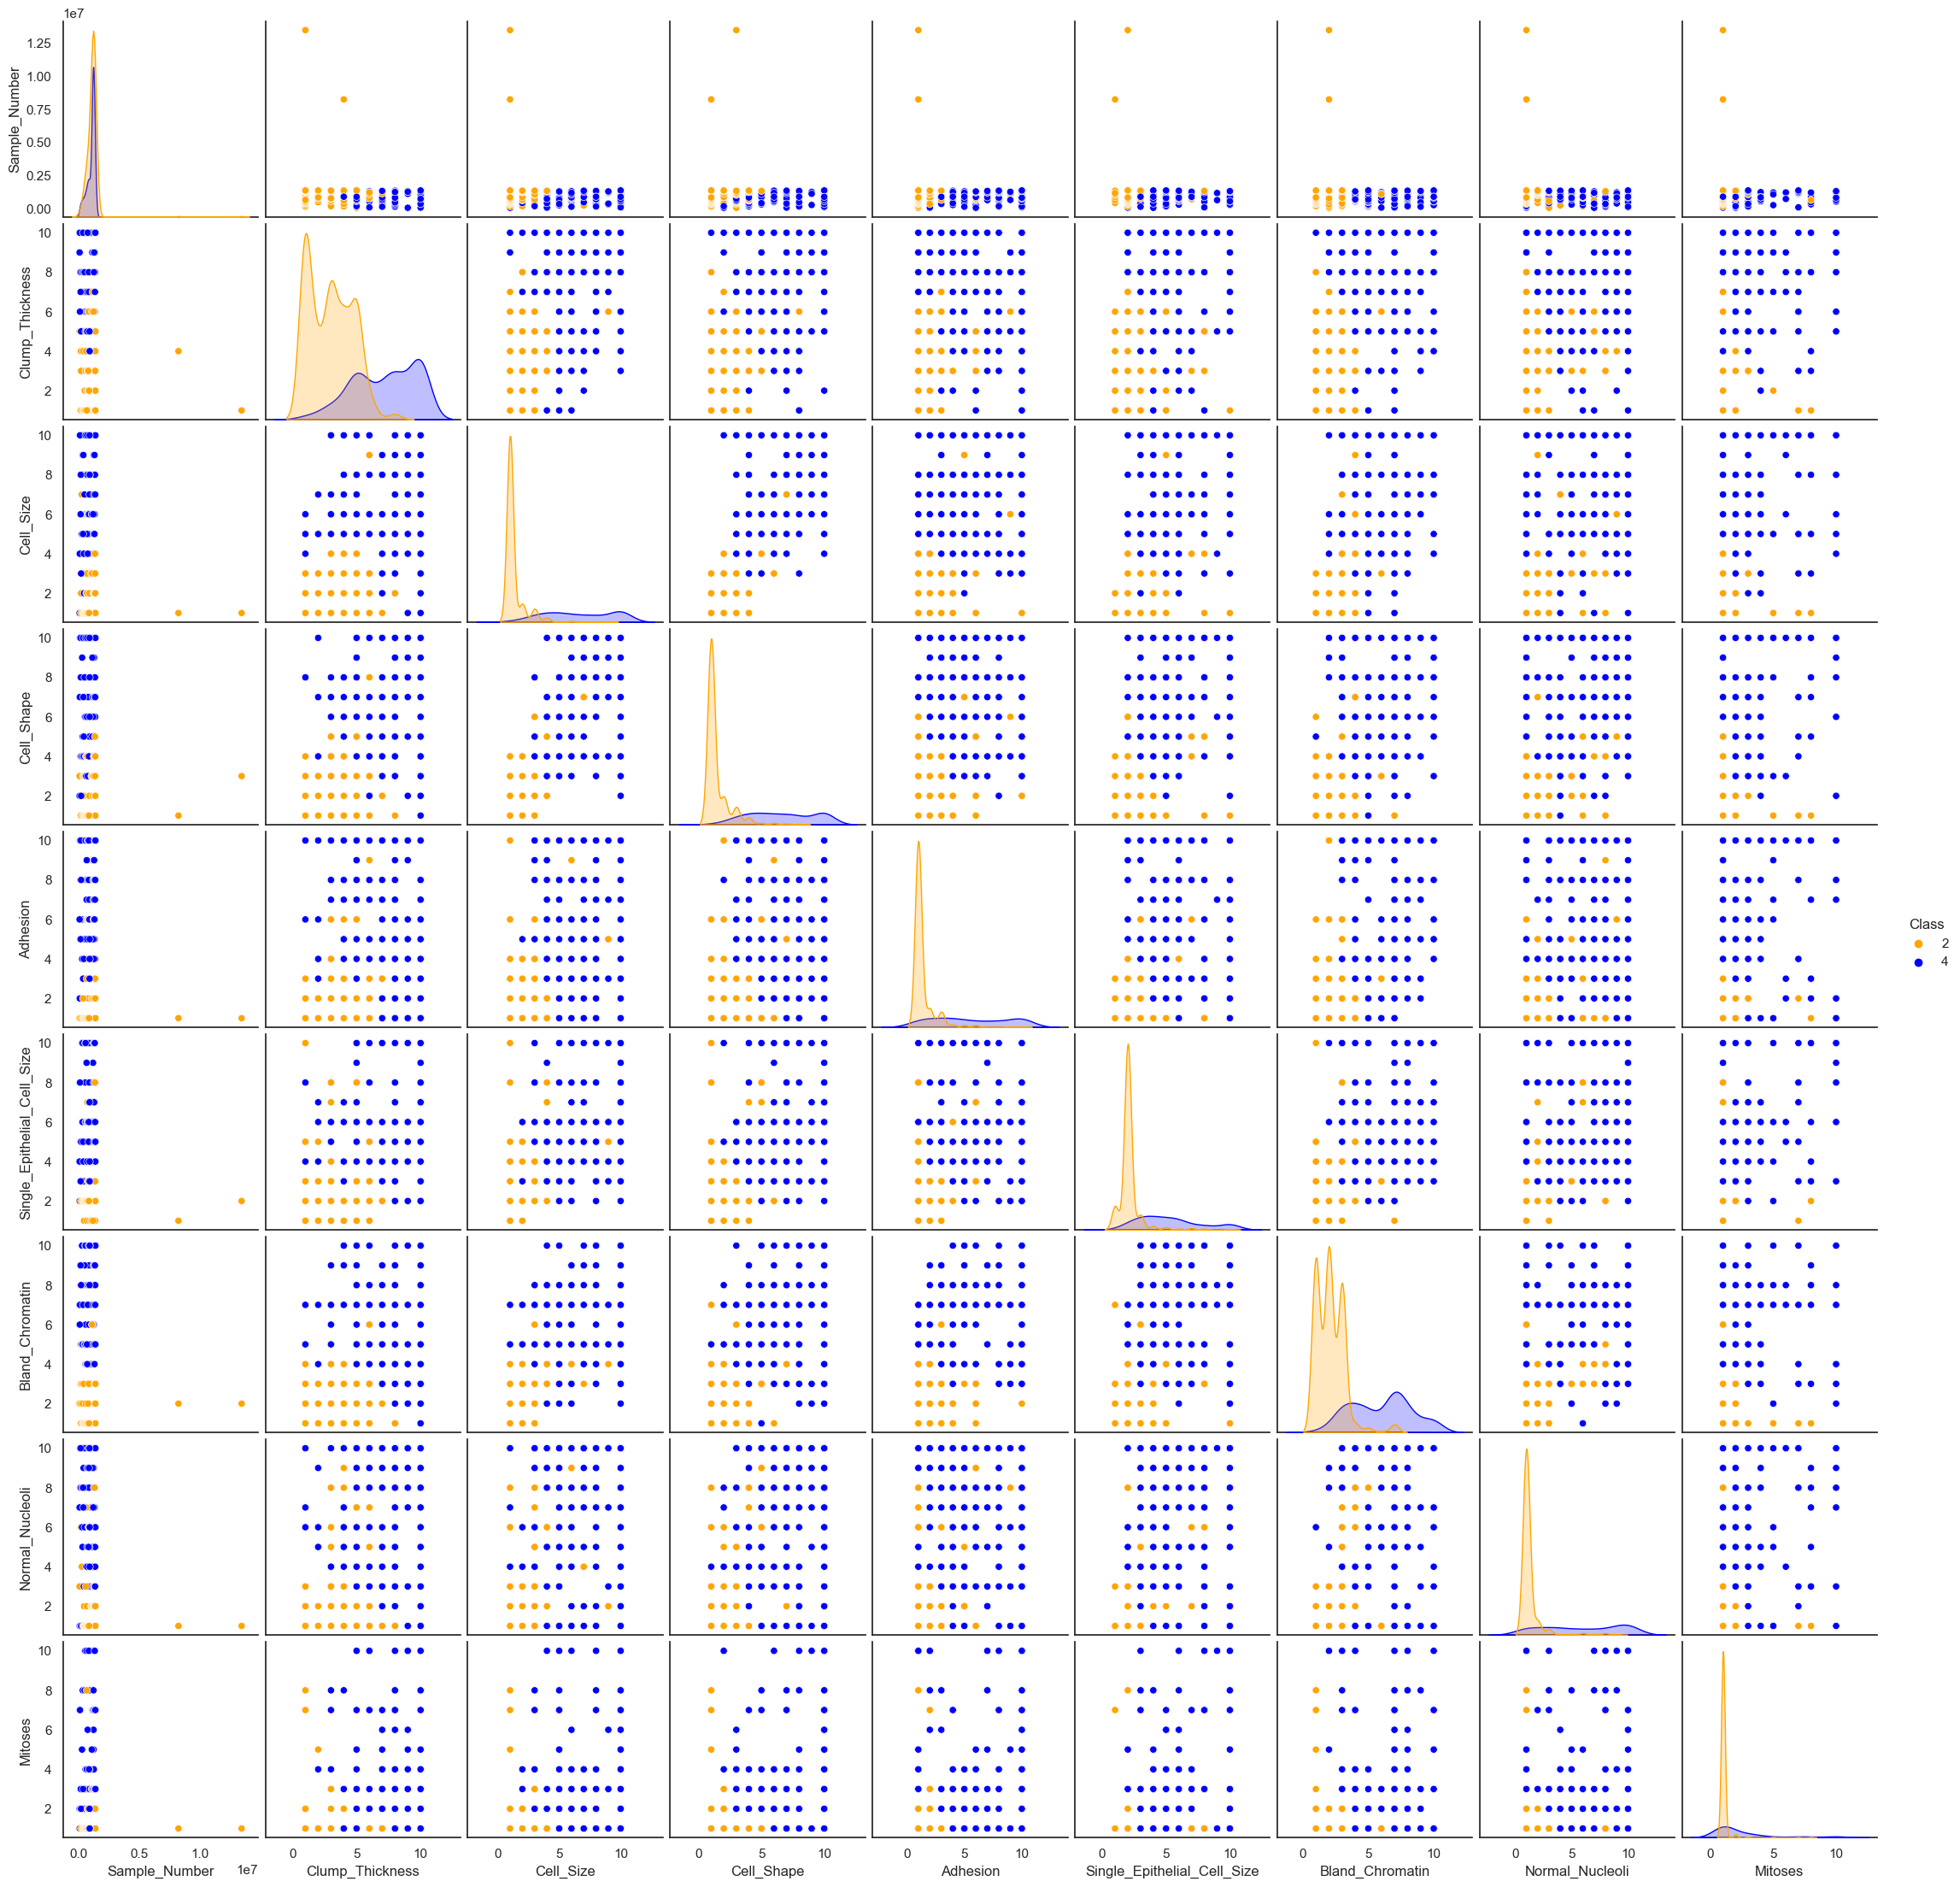

In [20]:
columns_mean=("Sample_Number", "Clump_Thickness", "Cell_Size", "Cell_Shape","Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class")
df_mean = pd.DataFrame(df,columns = df.columns)
sns.pairplot(df_mean, hue = "Class", diag_kind='kde',palette = ["orange","blue"])